<a href="https://colab.research.google.com/github/Haleem06/codsoft_taskno1/blob/main/codsoft_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/tested.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.shape

(418, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[df.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
mean_c3 = df.Fare[df.Pclass == 3].mean()
df['Fare'].fillna(value=mean_c3, inplace=True)

In [ ]:
mean_age_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print("The mean age of Miss title: ",mean_age_miss)
print("The mean age of Mrs title: ",mean_age_mrs)
print("The mean age of Mr title: ",mean_age_mr)
print("The mean age of Master: ",mean_age_master)

The mean age of Miss title:  22.0
The mean age of Mrs title:  39.0
The mean age of Mr title:  34.0
The mean age of Master:  7.0


In [ ]:
def filling_age(name_age):
    name = name_age[0]
    age = name_age[1]
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age
df['Age'] = df[['Name', 'Age']].apply(filling_age,axis=1)

In [ ]:
df.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
df_cat = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]
df_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,0
1,3,female,1,0,S,1
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,1


In [ ]:
categories = {"female": 1, "male": 0}
df['Sex']= df['Sex'].map(categories)

new_df = pd.concat([df, pd.get_dummies(df['Embarked'],drop_first=True)], axis=1)

new_df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,0,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,0,1
4,1,3,1,22.0,1,1,12.2875,0,1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Q         418 non-null    uint8  
 8   S         418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 23.8 KB


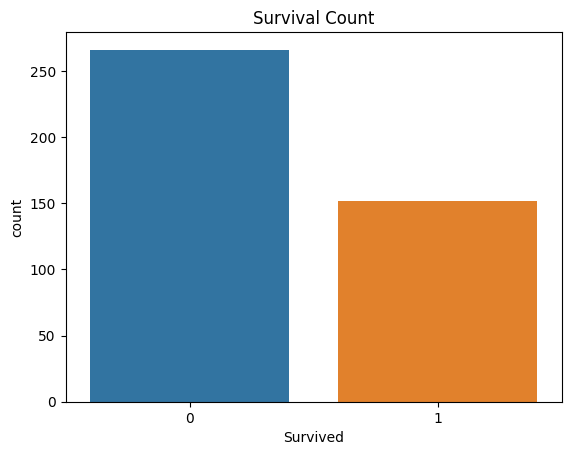

In [ ]:
sns.countplot(x='Survived', data=new_df)
plt.title('Survival Count')
plt.show()

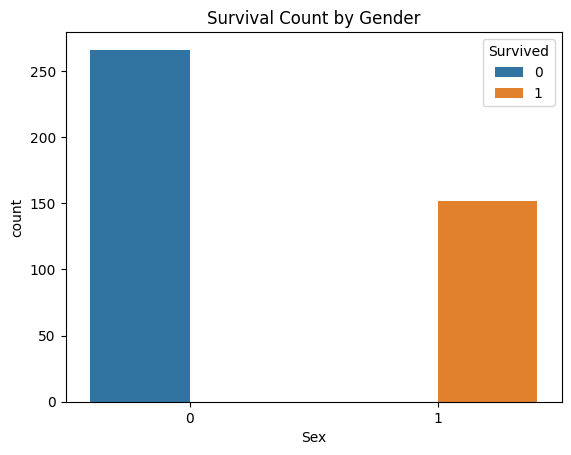

In [ ]:
sns.countplot(x='Sex', hue='Survived', data=new_df)
plt.title('Survival Count by Gender')
plt.show()

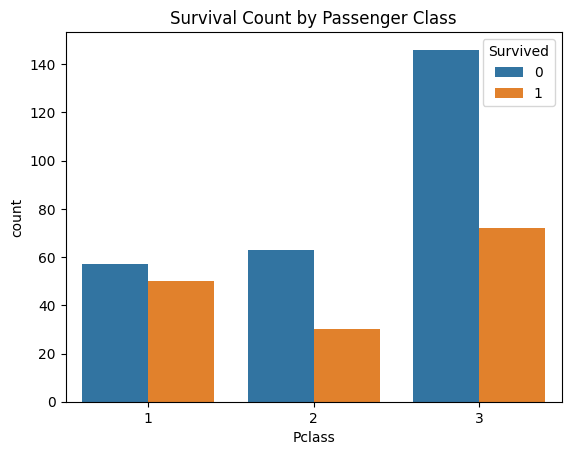

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=new_df)
plt.title('Survival Count by Passenger Class')
plt.show()

In [ ]:
corr = new_df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.108615,1.000000,-0.025462,0.099943,0.159120,0.192094,0.115574,-0.105883
Pclass,-0.108615,1.000000,-0.108615,-0.436823,0.001087,0.018721,-0.577368,0.252608,0.120783
Sex,1.000000,-0.108615,1.000000,-0.025462,0.099943,0.159120,0.192094,0.115574,-0.105883
Age,-0.025462,-0.436823,-0.025462,1.000000,-0.104316,-0.036099,0.309443,-0.049533,-0.113734
SibSp,0.099943,0.001087,0.099943,-0.104316,1.000000,0.306895,0.171949,-0.098824,0.079367
Parch,0.159120,0.018721,0.159120,-0.036099,0.306895,1.000000,0.230352,-0.132948,0.092201
Fare,0.192094,-0.577368,0.192094,0.309443,0.171949,0.230352,1.000000,-0.155157,-0.179163
Q,0.115574,0.252608,0.115574,-0.049533,-0.098824,-0.132948,-0.155157,1.000000,-0.474962
S,-0.105883,0.120783,-0.105883,-0.113734,0.079367,0.092201,-0.179163,-0.474962,1.000000


<Axes: >

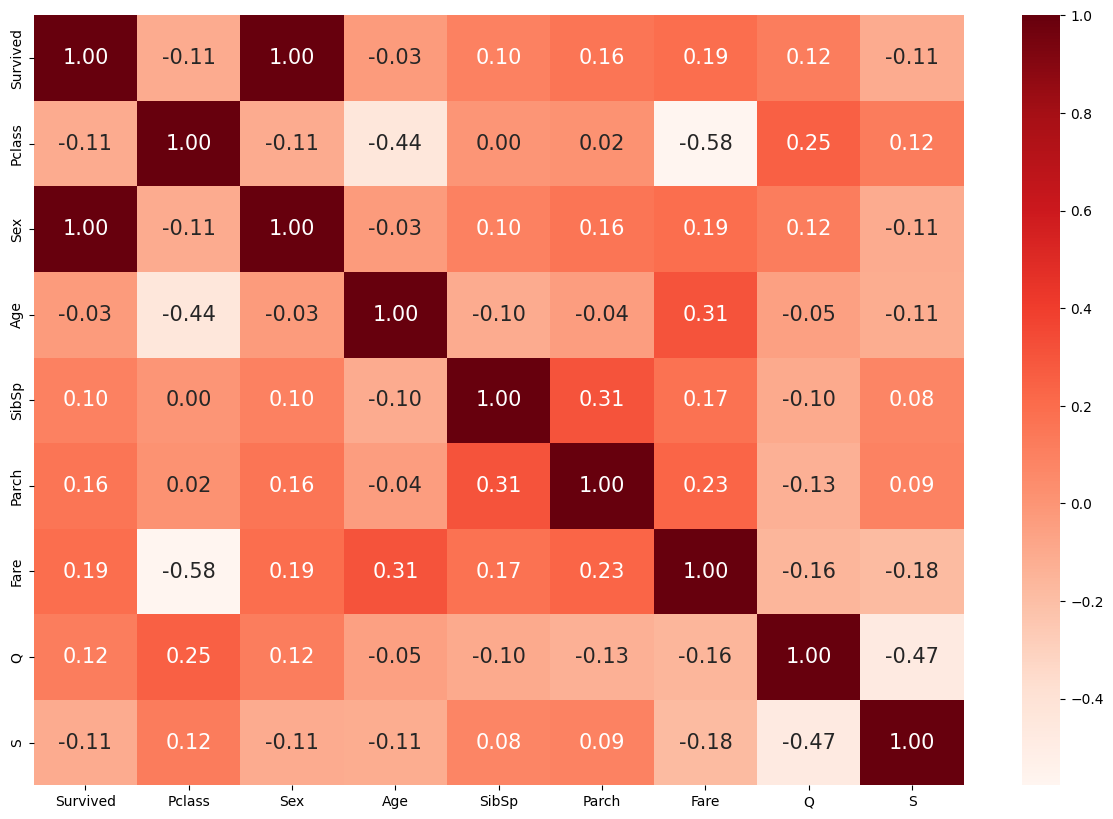

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Reds')

In [ ]:
new_df.drop(['Sex'], axis=1, inplace=True)

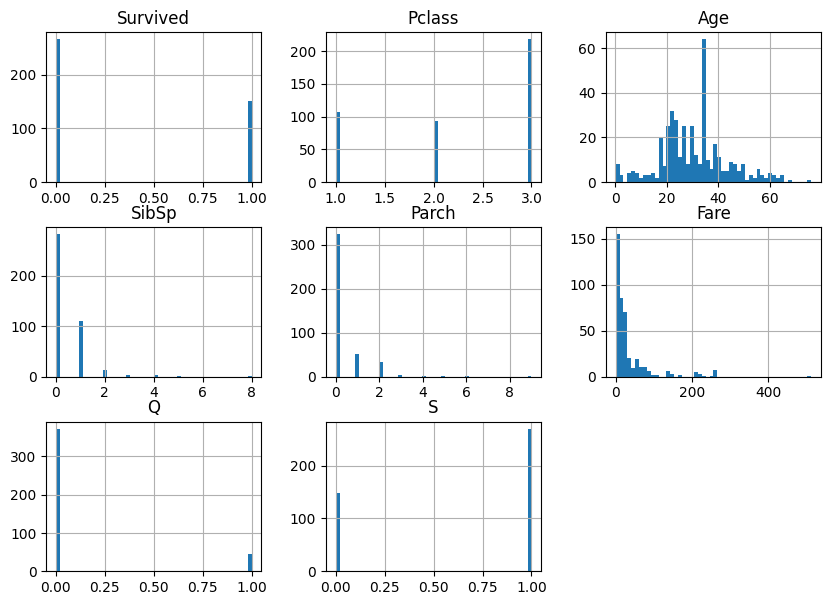

In [ ]:
new_df.hist(bins=50, figsize=(10,7))
plt.show()

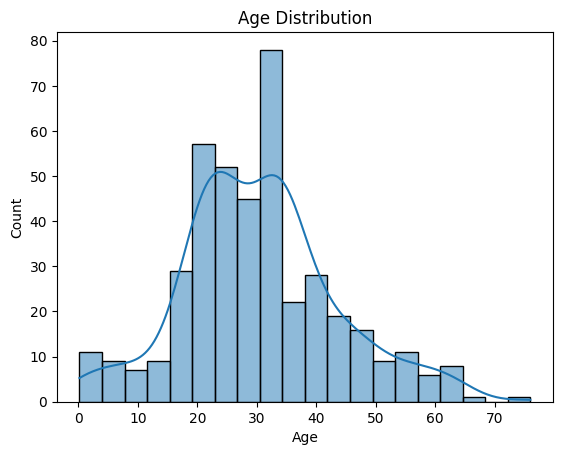

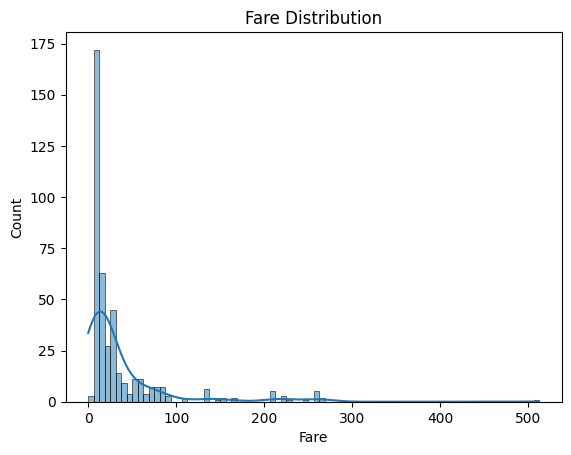

In [ ]:
sns.histplot(x='Age', data=new_df, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(x='Fare', data=new_df, kde=True)
plt.title('Fare Distribution')
plt.show()
